In [2]:
import glob

import cv2
import numpy as np
from matplotlib import pyplot as plt

# noinspection SpellCheckingInspection
FLANN_INDEX_KDTREE = 0

In [3]:
def find_keypoints(img_src):
	grey = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
	descriptor = cv2.xfeatures2d.SIFT_create()
	kp, ds = descriptor.detectAndCompute(grey, None)
	# cv2.drawKeypoints(image=img_src, keypoints=kp, outImage=img_src, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
	return kp, ds

In [53]:
def find_matches(des1, des2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    good_matches = []
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            good_matches.append([m])
    return tuple(good_matches)

In [54]:
def open_imgs(dir_path):
	"""
	:param dir_path:
	:return: list of images
	"""
	img_dir = "{}".format(dir_path)  # Enter Directory of all images
	data_path = cv2.os.path.join(img_dir, '*g')
	files = glob.glob(data_path)
	data = []
	for f1 in files:
		img = cv2.imread(f1)
		img = cv2.resize(img, (int(img.shape[1] * 0.2), int(img.shape[0] * 0.2)), 0.2, 0.2)
		data.append(img)
	return data

In [55]:
def get_img_hash(img):
	return repr(hash(img.tobytes()))

In [56]:
def describe_posters(posters):
	kps_and_dsc = {}
	for poster in posters:
		kps_and_dsc[get_img_hash(poster)] = find_keypoints(poster)

	return kps_and_dsc

In [57]:
def index_posters(posters):
	p_index = {}
	for poster in posters:
		p_index[get_img_hash(poster)] = poster
	return p_index

In [88]:
posters = open_imgs("database")
posters_index = index_posters(posters)
poster_kps_and_dsc = describe_posters(posters)

query_img = cv2.imread('query/hw7_poster_2.jpg')

query_img_resize = query_img

kp, ds = find_keypoints(query_img_resize)

all_matches = {}

for (poster_hash, poster_kps_dsc) in poster_kps_and_dsc.items():
    all_matches[poster_hash] = find_matches(poster_kps_dsc[1], ds)


In [89]:
all_matches_flat = sorted(all_matches.items(), key=lambda a: len(a[1]))

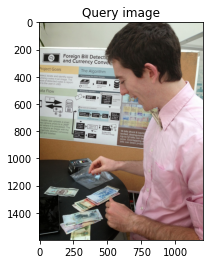

In [90]:
plt.imshow(cv2.cvtColor(query_img_resize, cv2.COLOR_BGR2RGB))
plt.title("Query image")
plt.show()

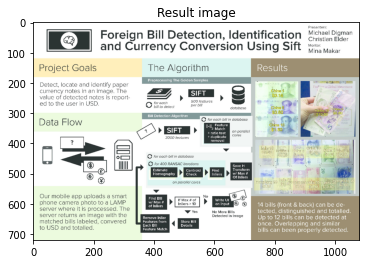

In [91]:
result_img = posters_index[all_matches_flat[-1][0]]
result_matches = all_matches_flat[-1][1]
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title("Result image")
plt.show()

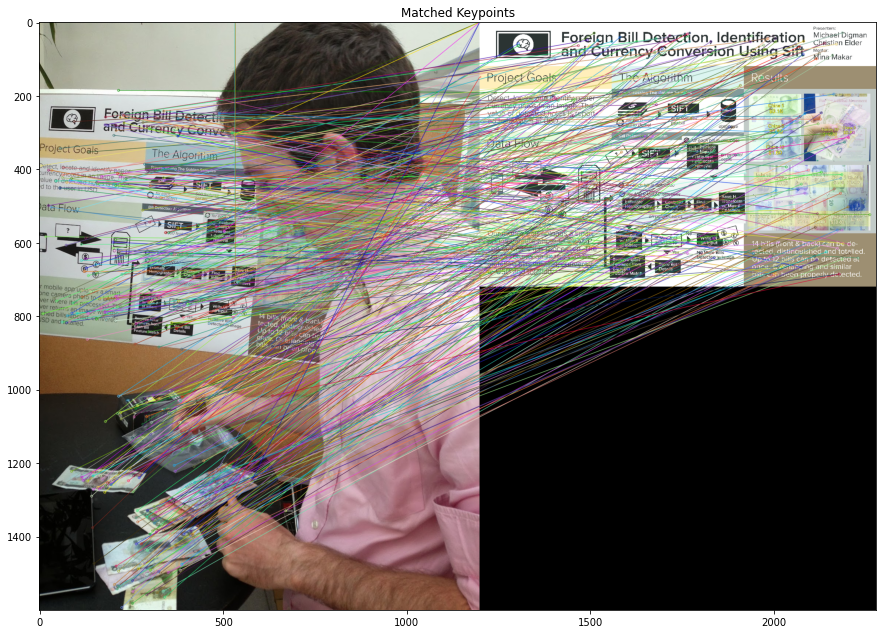

In [93]:
matched_img = cv2.drawMatchesKnn(
    query_img_resize,kp,
    result_img,poster_kps_and_dsc[get_img_hash(result_img)][0],
    result_matches,None,flags=2)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("Matched Keypoints")
plt.show()